## Análisis de los datos inciales

In [1]:
# Librerias necesarias 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Leer los datos
expuestos = pd.read_csv('Data\BD_Expuestos.txt', sep = '\s+', encoding = 'latin-1')
sociodemograficas = pd.read_csv('Data\BD_Sociodemograficas.txt', sep = '\s+', encoding = 'latin-1')
siniestros = pd.read_csv('Data\DB_Siniestros.txt', sep = ',', encoding = 'latin-1')

### Analisis univariado 

In [3]:
siniestros.head(3)

,Mes_Pago,Asegurado_Id,Reclamacion,Diagnostico_Codigo,Diagnostico_Desc,Eventos,Valor_Pagado
0,201803,4834968,EXAMENES DE DIAGNOSTICO,Z011,EXAMEN DE OÃDOS Y DE LA AUDICIÃN,1,4.953413e+05
1,201909,14915125,EXAMENES DE DIAGNOSTICO,9,DIAGNÃSTICO PENDIENTE,1,4.229947e+05
2,201807,42959949,EXAMENES DE DIAGNOSTICO,9,DIAGNÃSTICO PENDIENTE,1,1.085708e+06


In [8]:
# Lista de variables binarias
variables = ['CANCER', 'EPOC', 'DIABETES', 'HIPERTENSION', 'ENF_CARDIOVASCULAR', 'Mujer', 'Ciudad']

# Paleta de colores personalizada (gris)
colors = ['#7f7f7f', '#b2b2b2', '#cccccc', '#e5e5e5', '#f2f2f2', '#b2b2b2']

# Crear un gráfico de torta para cada variable
for variable in variables:
    # Contar el número de ocurrencias de cada categoría en la variable
    attrition_counts = sociodemograficas[variable].value_counts()
    
    # Crear el gráfico de torta con la paleta de colores personalizada
    fig = px.pie(values=attrition_counts, 
                 names=attrition_counts.index, 
                 title=f'Distribución de {variable}',
                 color_discrete_sequence=colors)
    
    fig.show()

# Análisis bivariado #

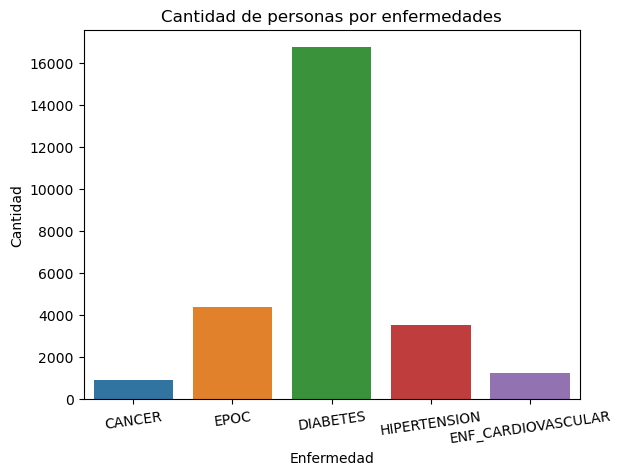

In [4]:
c1 = pd.DataFrame(sociodemograficas[['CANCER','EPOC', 'DIABETES', 'HIPERTENSION', 'ENF_CARDIOVASCULAR']].sum(), columns = ['Conteo'])
c1 = c1.reset_index()
c1 = c1.rename(columns={'index':'Enfermedad'})
sns.barplot(c1, x='Enfermedad', y ='Conteo')
plt.title('Cantidad de personas por enfermedades')
plt.ylabel('Cantidad')
plt.xticks(rotation = 8)
plt.show()

In [5]:
base = pd.merge(sociodemograficas,siniestros, on='Asegurado_Id')

In [6]:
costos_cancer = base.loc[base['CANCER'] == 1]
costos_cancer = costos_cancer[['CANCER','Valor_Pagado']]
display(costos_cancer)

costos_epoc = base.loc[base['EPOC'] == 1]
costos_epoc = costos_epoc[['EPOC','Valor_Pagado']]
display(costos_epoc)

costos_diabetes = base.loc[base['DIABETES'] == 1]
costos_diabetes = costos_diabetes[['DIABETES','Valor_Pagado']]
display(costos_diabetes)

costos_hipertension = base.loc[base['HIPERTENSION'] == 1]
costos_hipertension = costos_hipertension[['HIPERTENSION','Valor_Pagado']]
display(costos_hipertension)

costos_cardiovascular = base.loc[base['ENF_CARDIOVASCULAR'] == 1]
costos_cardiovascular = costos_cardiovascular[['ENF_CARDIOVASCULAR','Valor_Pagado']]
display(costos_cardiovascular)

costos_totales = {'CANCER':costos_cancer['Valor_Pagado'].sum(),
                 'EPOC': costos_epoc['Valor_Pagado'].sum(), 
                 'DIABETES': costos_diabetes['Valor_Pagado'].sum(), 
                 'HIPERTENSION': costos_hipertension['Valor_Pagado'].sum(), 
                 'ENF_CARDIOVASCULAR': costos_cardiovascular['Valor_Pagado'].sum()}

df_costos = pd.DataFrame(costos_totales, index=['Costos totales'])
df_costos


,CANCER,Valor_Pagado
5246,1,4.642308e+05
5247,1,4.586544e+05
5248,1,4.694169e+05
5249,1,6.443975e+05
5250,1,6.206361e+05
...,...,...
3304676,1,7.115008e+05
3304677,1,5.706494e+05
3304678,1,3.936451e+05
3304679,1,3.930581e+05


,EPOC,Valor_Pagado
167,1,4.385499e+05
168,1,7.226155e+05
169,1,4.717502e+05
170,1,5.232234e+05
171,1,4.002238e+05
...,...,...
3306873,1,4.642308e+05
3306874,1,4.543723e+05
3306875,1,7.442682e+05
3306876,1,7.957238e+05


,DIABETES,Valor_Pagado
40,1,4.512994e+05
41,1,4.894714e+05
42,1,8.718125e+05
43,1,5.458035e+05
44,1,5.212438e+05
...,...,...
3306762,1,3.983234e+05
3306763,1,8.974303e+05
3306764,1,1.006721e+06
3306765,1,7.801584e+06


,HIPERTENSION,Valor_Pagado
40,1,4.512994e+05
41,1,4.894714e+05
42,1,8.718125e+05
43,1,5.458035e+05
44,1,5.212438e+05
...,...,...
3305541,1,4.224881e+06
3305542,1,4.027288e+05
3305543,1,5.342544e+05
3305544,1,2.288266e+06


,ENF_CARDIOVASCULAR,Valor_Pagado
890,1.0,6.666268e+05
891,1.0,4.710179e+05
892,1.0,5.427893e+05
893,1.0,2.348684e+06
894,1.0,4.508894e+06
...,...,...
3304676,1.0,7.115008e+05
3304677,1.0,5.706494e+05
3304678,1.0,3.936451e+05
3304679,1.0,3.930581e+05


,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR
Costos totales,4.207425e+10,2.363973e+11,3.885242e+11,1.107640e+11,4.917189e+10


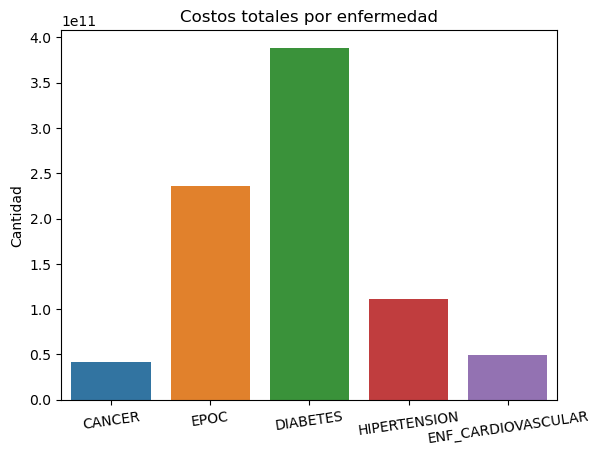

In [7]:
sns.barplot(df_costos)
plt.title('Costos totales por enfermedad')
plt.ylabel('Cantidad')
plt.xticks(rotation = 8)
plt.show()